In [25]:
root_dir = 'C:\\Users\\baekj\\Downloads\\dog_image'

In [26]:
import os
import shutil

if os.path.exists( os.path.join(root_dir, 'dog_image') ):
    shutil.rmtree( os.path.join(root_dir, 'dog_image') )

In [27]:
import os
import shutil

if not os.path.exists(os.path.join(root_dir, '\\test')):    
    os.mkdir(os.path.join(root_dir, '\\test'))

if not os.path.exists(os.path.join(root_dir, '\\test_image_files')):    
    os.mkdir(os.path.join(root_dir, '\\test_image_files'))

In [28]:
# 데이터 전체 개수 확인

import os
import glob

label_name_list = os.listdir(os.path.join(root_dir, 'C:\\Users\\baekj\\Downloads\\dog_image\\train'))

print('total label nums = ', len(label_name_list))
print('=================================================')
print(label_name_list)

total label nums =  4
['chihuahua', 'jindo_dog', 'shepherd', 'yorkshire_terrier']


In [31]:
import os
import glob
import shutil

ratio = 0.1    # train : test = 90 : 10

src_root_dir = os.path.join(root_dir, 'C:/Users/baekj/Downloads/dog_image/train')
dst_root_dir = os.path.join(root_dir, 'C:/Users/baekj/Downloads/dog_image/test')

label_name_list = os.listdir(src_root_dir) 

for label_name in label_name_list:   # test 디렉토리에 label 디렉토리 생성
    dst_label_name_dir = os.path.join(dst_root_dir, label_name)

    if not os.path.exists(dst_label_name_dir):
        os.mkdir(dst_label_name_dir)

for label_name in label_name_list:    # 파일 move src dir => dst dir
    train_image_file_list = glob.glob(os.path.join(src_root_dir, label_name, '*'))
    split_num = int(ratio * len(train_image_file_list))
    test_image_file_list = train_image_file_list[0:split_num]

    for image_file in test_image_file_list:
        shutil.move(image_file, os.path.join(dst_root_dir, label_name))    # move

In [32]:
# train : test 데이터 비율 확인

src_root_dir = os.path.join(root_dir, 'C:/Users/baekj/Downloads/dog_image/train')
dst_root_dir = os.path.join(root_dir, 'C:/Users/baekj/Downloads/dog_image/test')

train_label_name_list = os.listdir(src_root_dir)
test_label_name_list = os.listdir(dst_root_dir)

train_label_name_list.sort()
test_label_name_list.sort()

if train_label_name_list != test_label_name_list:
    print('fatal error !!!!')
else:
    print(len(train_label_name_list), len(test_label_name_list))

# 데이터 개수 확인

for label_name in train_label_name_list:

    train_data_nums = len(os.listdir(os.path.join(src_root_dir, label_name)))
    test_data_nums = len(os.listdir(os.path.join(dst_root_dir, label_name)))

    print('train => ', label_name, train_data_nums, ' , test => ', label_name, test_data_nums)
    print('=======================================================')

4 4
train =>  chihuahua 329  , test =>  chihuahua 36
train =>  jindo_dog 324  , test =>  jindo_dog 36
train =>  shepherd 339  , test =>  shepherd 37
train =>  yorkshire_terrier 342  , test =>  yorkshire_terrier 37


In [33]:
import os
import glob
import shutil

src_root_dir = os.path.join(root_dir, 'C:/Users/baekj/Downloads/dog_image/test/')
dst_root_dir = os.path.join(root_dir, 'C:/Users/baekj/Downloads/dog_image/test_image_files/')

# 대상 디렉토리가 없다면 생성합니다.
if not os.path.exists(dst_root_dir):
    os.makedirs(dst_root_dir)

label_name_list = os.listdir(src_root_dir)

for label_name in label_name_list:  # 파일 copy src dir => dst dir
    image_file_list = glob.glob(os.path.join(src_root_dir, label_name, '*'))
    print('total [%s] image file nums => [%s]' % (label_name, len(image_file_list)))

    copy_nums = 0

    for image_file in image_file_list:
        shutil.copy(image_file, os.path.join(dst_root_dir, os.path.basename(image_file)))  # copy 
        copy_nums = copy_nums + 1

    print('total copy nums => ', copy_nums)

total [chihuahua] image file nums => [36]
total copy nums =>  36
total [jindo_dog] image file nums => [36]
total copy nums =>  36
total [shepherd] image file nums => [37]
total copy nums =>  37
total [yorkshire_terrier] image file nums => [37]
total copy nums =>  37


In [34]:
IMG_WIDTH = 224  
IMG_HEIGHT = 224  


train_dir = os.path.join(root_dir, 'C:/Users/baekj/Downloads/dog_image/train/')
validation_dir = os.path.join(root_dir, 'C:/Users/baekj/Downloads/dog_image/train/')
test_dir = os.path.join(root_dir, 'C:/Users/baekj/Downloads/dog_image/test/')


In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator 인스턴스 생성
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, 
                                    height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                    validation_split=0.15)

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)


In [36]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=16, color_mode='rgb', 
                                                class_mode='sparse', subset = 'training',
                                                target_size=(IMG_WIDTH,IMG_HEIGHT))

validation_generator = validation_datagen.flow_from_directory(validation_dir, batch_size=16, color_mode='rgb', 
                                                          class_mode='sparse', subset = 'validation',
                                                          target_size=(IMG_WIDTH,IMG_HEIGHT))

Found 1136 images belonging to 4 classes.
Found 198 images belonging to 4 classes.


In [37]:
print(train_generator.class_indices)

{'chihuahua': 0, 'jindo_dog': 1, 'shepherd': 2, 'yorkshire_terrier': 3}


In [38]:
import tensorflow as tf 
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
import scipy

In [39]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH,IMG_HEIGHT,3))

# MobileNet 모델을 가져옵니다.
# weights='imagenet'는 ImageNet 데이터셋으로 사전 학습된 가중치를 사용하겠다는 의미입니다. imagenet을 가중치로 사용 가능한 모델 참조. https://keras.io/ko/applications/
# include_top=False는 모델의 최상위 레이어를 포함하지 않겠다는 의미로, 이는 마지막 분류 레이어를 제외하고 가져오라는 뜻입니다.
# input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)는 입력 이미지의 크기를 지정합니다. RGB 이미지이므로 채널 수는 3입니다.


In [40]:
model = Sequential() # 새로운 신경망 모델을 생성합니다. 이 모델은 순차적으로 레이어를 추가하는 방식으로 구성됩니다

model.add(base_model) # 기본 모델인 base_model을 모델에 추가합니다. 이는 전환 학습에서 기본 모델의 특징 추출 능력을 활용하려는 의도입니다.

model.add(Flatten()) #base_model에서 나온 다차원 텐서를 1차원으로 평탄화합니다. 이는 다음 레이어에서 완전 연결 레이어를 사용하기 위한 준비 단계입니다.
model.add(Dense(32, activation='relu')) # 32개의 뉴런을 가진 완전 연결 레이어를 추가합니다. 활성화 함수로는 ReLU(Rectified Linear Unit) 함수를 사용합니다. 이 레이어는 비선형성을 추가하여 모델이 더 복잡한 패턴을 학습할 수 있도록 도와줍니다
model.add(Dropout(0.25)) #드롭아웃(Dropout) 레이어를 추가합니다. 드롭아웃은 과적합을 줄이기 위한 방법으로, 학습 시에 일부 뉴런을 임시로 끄는 것을 의미합니다. 여기서는 25%의 확률로 뉴런을 비활성화시킵니다.                 
model.add(Dense(4, activation='softmax')) #최종 출력 레이어를 추가합니다. 이 레이어는 클래스 수와 같은 뉴런 수를 가집니다. 활성화 함수로는 소프트맥스(Softmax) 함수를 사용하여 각 클래스에 대한 확률 분포를 얻습니다.

In [41]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(2e-5), metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                1605664   
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 4834660 (18.44 MB)
Trainable params: 4812772 (18.36 MB)
Non-trainable params: 21888 (85.50 KB)
___________

In [42]:
import scipy  # 올바른 대소문자로 임포트

from tensorflow.keras.callbacks import EarlyStopping

earlystopping = EarlyStopping(monitor='val_loss', patience=5)                     

hist = model.fit(train_generator, validation_data=validation_generator,
                 epochs=20, callbacks=[earlystopping])

Epoch 1/20
71/71 [==============================] - 142s 2s/step - loss: 1.3465 - accuracy: 0.4674 - val_loss: 0.7241 - val_accuracy: 0.6869
Epoch 2/20
71/71 [==============================] - 125s 2s/step - loss: 0.7399 - accuracy: 0.7033 - val_loss: 0.4623 - val_accuracy: 0.8333
Epoch 3/20
71/71 [==============================] - 126s 2s/step - loss: 0.5763 - accuracy: 0.7835 - val_loss: 0.2865 - val_accuracy: 0.8939
Epoch 4/20
71/71 [==============================] - 127s 2s/step - loss: 0.4289 - accuracy: 0.8415 - val_loss: 0.2846 - val_accuracy: 0.8788
Epoch 5/20
71/71 [==============================] - 128s 2s/step - loss: 0.3874 - accuracy: 0.8539 - val_loss: 0.2700 - val_accuracy: 0.9040
Epoch 6/20
71/71 [==============================] - 126s 2s/step - loss: 0.3612 - accuracy: 0.8671 - val_loss: 0.1917 - val_accuracy: 0.9394
Epoch 7/20
71/71 [==============================] - 121s 2s/step - loss: 0.2826 - accuracy: 0.8935 - val_loss: 0.1820 - val_accuracy: 0.9343
Epoch 8/20
71

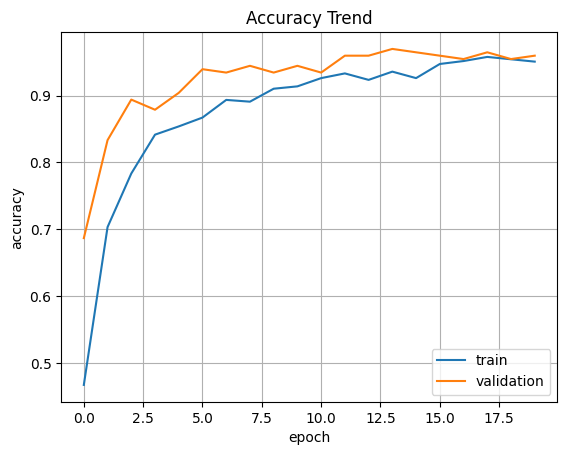

In [43]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

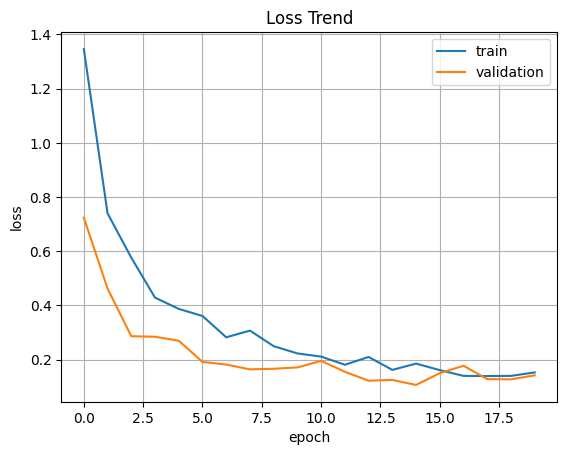

In [44]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

In [45]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [46]:
test_generator = test_datagen.flow_from_directory(test_dir, batch_size=32, color_mode='rgb',
                                              class_mode='sparse', target_size=(IMG_WIDTH,IMG_HEIGHT))

Found 146 images belonging to 4 classes.


In [47]:
model.evaluate(test_generator)

5/5 [==============================] - 3s 575ms/step - loss: 0.1371 - accuracy: 0.9452


[0.1371305286884308, 0.9452054500579834]

In [50]:
import random
import os
import numpy as np
import cv2
import glob

label_dict = {'chihuahua': 0, 'jindo_dog': 1, 'shepherd': 2, 'yorkshire_terrier': 3}

test_image_files_list = glob.glob(root_dir+ '/test_image_files/*.jpg')

random.shuffle(test_image_files_list)

test_num = 16
test_image_files = test_image_files_list[:test_num]  # 태스트 파일이름은 정답.숫자.jpg 

label_list = []

for i in range(len(test_image_files)):
    label = os.path.basename(test_image_files[i]).split('.')[0].strip()
    label_list.append(label_dict[label])


src_img_list = []

for i in range(len(test_image_files)):
    src_img = cv2.imread(test_image_files[i], cv2.IMREAD_COLOR)
    src_img = cv2.resize(src_img, dsize=(IMG_WIDTH, IMG_HEIGHT))
    src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
    src_img = src_img / 255.0

    src_img_list.append(src_img)

# 4차원 텐서  변환
src_img_array = np.array(src_img_list)
label_array = np.array(label_list)

print(src_img_array.shape, label_array.shape)
print(label_array)

(16, 224, 224, 3) (16,)
[0 1 1 2 2 0 3 0 0 2 1 0 2 1 3 0]


In [51]:
pred = model.predict(src_img_array)
print(pred.shape)

1/1 [==============================] - 1s 1s/step
(16, 4)


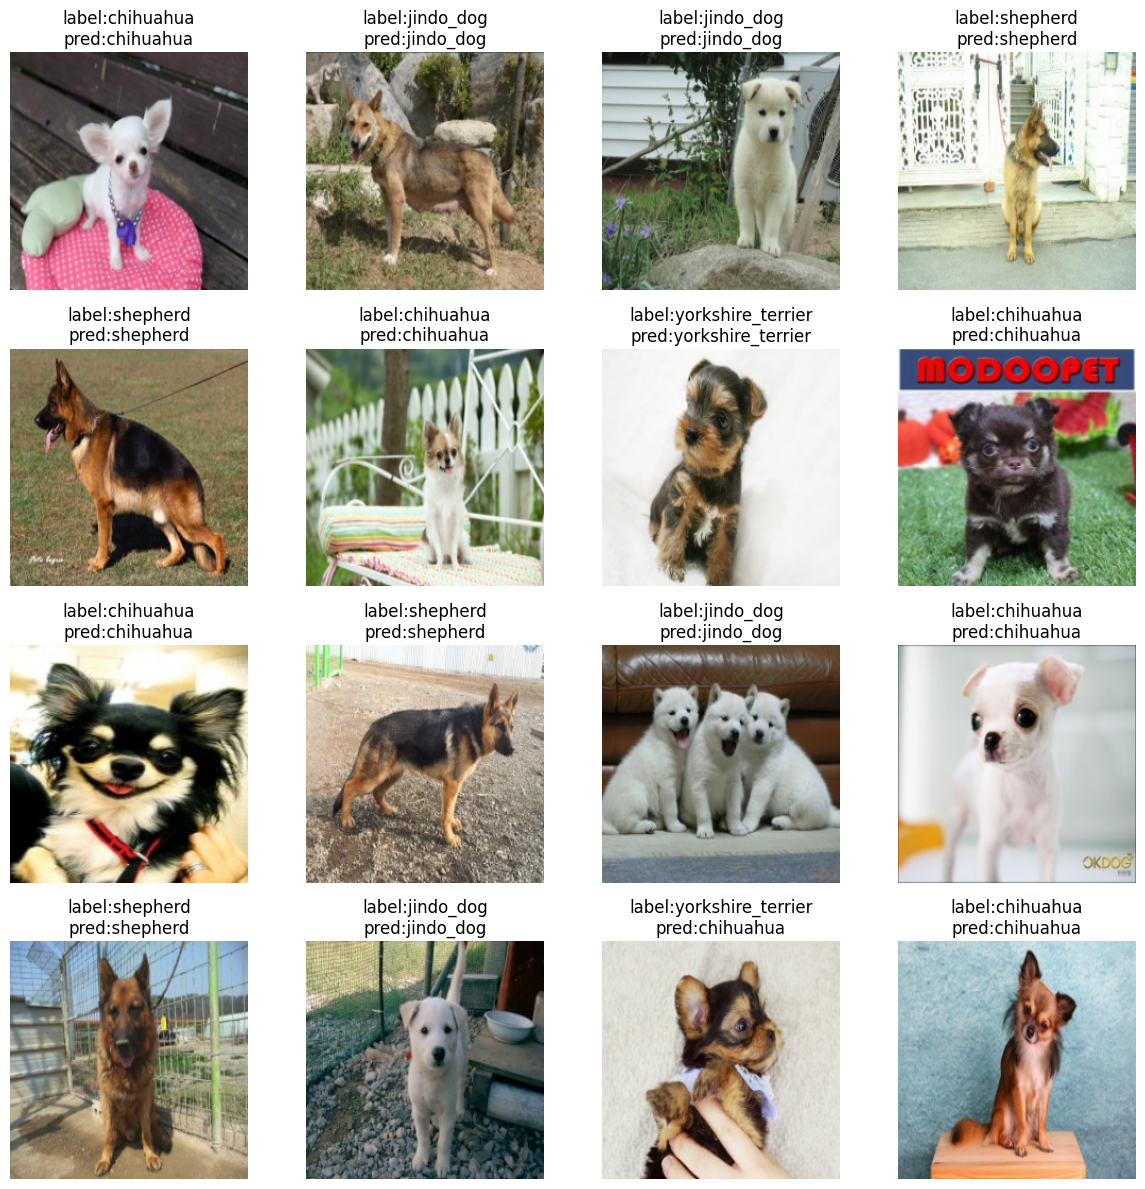

In [52]:
import matplotlib.pyplot as plt

class_names = ['chihuahua', 'jindo_dog', 'shepherd', 'yorkshire_terrier']

plt.figure(figsize=(12,12))

for pos in range(len(pred)):

    plt.subplot(4,4,pos+1)
    plt.axis('off')

    label_str = class_names[label_array[pos]]
    pred_str = class_names[np.argmax(pred[pos])]

    plt.title('label:' + label_str + '\npred:' + pred_str)

    plt.imshow(src_img_array[pos])

plt.tight_layout()
plt.show()